Handling missing data 1 **: By removing rows of that particular column (CCA technique)**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahid09092005","key":"dde1830fa7a75a0afef8603147016684"}'}

In [49]:
!kaggle datasets download -d shilongzhuang/-women-clothing-ecommerce-sales-data

Dataset URL: https://www.kaggle.com/datasets/shilongzhuang/-women-clothing-ecommerce-sales-data
License(s): other
-women-clothing-ecommerce-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [50]:
!unzip /content/-women-clothing-ecommerce-sales-data.zip

Archive:  /content/-women-clothing-ecommerce-sales-data.zip
  inflating: women_clothing_ecommerce_sales.csv  


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv('/content/women_clothing_ecommerce_sales.csv')

In [52]:
df.shape

(527, 8)

In [53]:
df.sample(5)

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
11,11,2022/6/12 21:16:00,708,Dark Blue,3XL,278,1,278
164,142,2022/7/29 14:52:00,799,Dark Blue,M,266,1,266
382,54,2022/9/11 8:33:00,799,Dark Blue,M,265,1,265
28,22,2022/6/15 7:30:00,799,Dark Blue,XL,264,1,264
312,271,2022/8/30 5:47:00,799,Dark Blue,XL,278,1,278


In [54]:
df.isnull().sum()

,0
order_id,0
order_date,0
sku,0
color,0
size,37
unit_price,0
quantity,0
revenue,0


**here we only word with missing data**,
in above size is missing

In [56]:
df.isnull().mean()*100

,0
order_id,0.000000
order_date,0.000000
sku,0.000000
color,0.000000
size,7.020873
unit_price,0.000000
quantity,0.000000
revenue,0.000000


here size columns have 7% missing data, it is not recommended to perform CAA , but for try purpose we do.

In [64]:
# fetching on those columns that have means is less than 10 %
cols=[x for x in df.columns if df[x].isnull().mean()<0.10 and df[x].isnull().mean()>0]
cols

['size']

In [73]:
temp=df['size'].dropna()

In [74]:
temp

,size
0,2XL
1,2XL
2,One Size
3,XL
4,M
...,...
522,M
523,4XL
524,M
525,L


In [71]:
columns_name=df.columns

In [72]:
# if we drop all the rows corrosponding to columns that have missing value then the amount of data left.
len(df[columns_name].dropna())/len(df)

0.9297912713472486

we can't draw below kde plot bcz the size

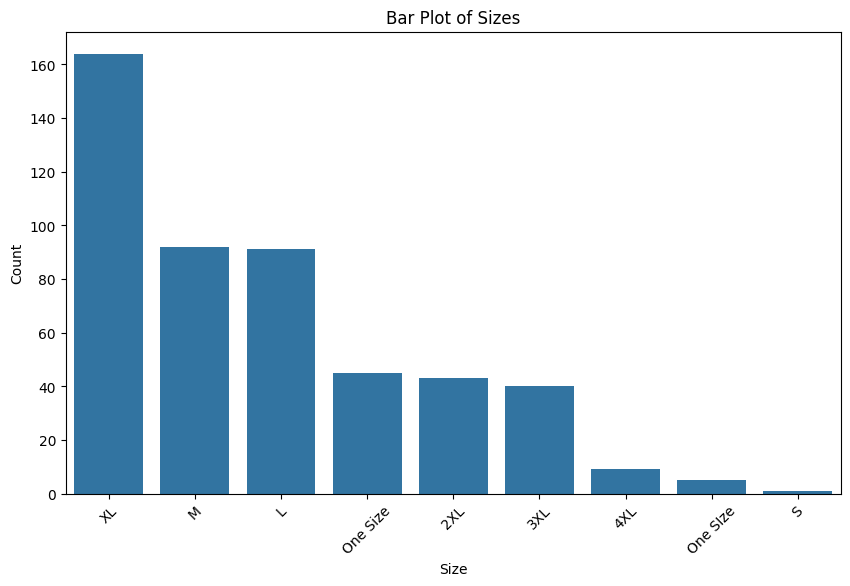

In [75]:
# Assuming 'df' is your DataFrame and the columns are 'column1' and 'column2'
plt.figure(figsize=(10, 6))

# Create the KDE plot
sns.kdeplot(data=df, x=cols['size'], y=df['size'], fill=True, cmap='Blues', thresh=0)

# Add titles and labels
plt.title('KDE Plot of Column1 vs Column2')
plt.xlabel('before removing')
plt.ylabel('after removing')

# Show the plot
plt.show()